In [327]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [328]:
happiness_data = pd.read_csv(r"C:\Users\sanfe\Downloads\HappinessAlcoholConsumption.csv") # Open the file

In [329]:
happiness_data.head() # See the first rows of the dataset

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [330]:
# Add a new column, equal to the sum of drinks per capita
happiness_data["Total_PerCapita"] = happiness_data["Beer_PerCapita"] + happiness_data["Spirit_PerCapita"] + happiness_data["Wine_PerCapita"]

In [331]:
happiness_data = happiness_data.set_index("Country") # Set country column as index of the rows

In [332]:
happiness_data.info() # I don't have any null values

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, Denmark to Syria
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            122 non-null    object 
 1   Hemisphere        122 non-null    object 
 2   HappinessScore    122 non-null    float64
 3   HDI               122 non-null    int64  
 4   GDP_PerCapita     122 non-null    float64
 5   Beer_PerCapita    122 non-null    int64  
 6   Spirit_PerCapita  122 non-null    int64  
 7   Wine_PerCapita    122 non-null    int64  
 8   Total_PerCapita   122 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 9.5+ KB


In [333]:
happiness_data.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Total_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361,300.762295
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503,205.128505
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000,5.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000,112.500000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000,298.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000,473.500000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000,665.000000


In [334]:
# Find the values to create the categories of happiness
happiness_data["HappinessScore"].sort_values()[20], happiness_data["HappinessScore"].sort_values()[-20]

(4.219, 6.778)

In [335]:
# Create the new column Happiness Category
happiness_data.loc[happiness_data["HappinessScore"] < happiness_data["HappinessScore"].sort_values()[40],"HappinessCategory"] = "Low"
happiness_data.loc[happiness_data["HappinessScore"] > happiness_data["HappinessScore"].sort_values()[-40],"HappinessCategory"] = "High"

In [336]:
happiness_data["HappinessCategory"].fillna("Medium", inplace = True)

In [337]:
happiness_data["HappinessCategory"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [338]:
happiness_data.columns

Index(['Region', 'Hemisphere', 'HappinessScore', 'HDI', 'GDP_PerCapita',
       'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita',
       'Total_PerCapita', 'HappinessCategory'],
      dtype='object')

In [339]:
happiness_data.Hemisphere.unique()

array(['north', 'south', 'both', 'noth'], dtype=object)

In [340]:
happiness_data[happiness_data.Hemisphere == "noth"].index

Index(['Japan', 'South Korea', 'China', 'Mongolia'], dtype='object', name='Country')

I suppose that the "noth" value is an error, since all the relative countries are in the northen hemisphere. So, I change it into "north".

In [341]:
happiness_data.loc[happiness_data.Hemisphere == "noth", "Hemisphere"] = "north"

In [342]:
happiness_data.Hemisphere.unique()

array(['north', 'south', 'both'], dtype=object)

Change values of GDP per capita

I noticed that there were some values with too high GDP per capita with respect to all the other values (the maximum value in the column, exluding the problematic values, was around 100). It seemed impossible that Senegal had a GDP per capita equal to 953, while Norway a value around 71. 

I decided to analyze them, and after a few comparisons, I supposed that all of these values had an error relative to the digits of the number. I divided them by 100, and the result seemed better.

In [343]:
happiness_data.loc[happiness_data.loc[:, "GDP_PerCapita"] > 200, "HappinessCategory"] # Which are the countries with too high GDP?

Country
Sierra Leone    Low
Rep. Congo      Low
Senegal         Low
Malawi          Low
Mali            Low
Haiti           Low
Comoros         Low
Niger           Low
Chad            Low
Burkina Faso    Low
Madagascar      Low
Tanzania        Low
Liberia         Low
Benin           Low
Togo            Low
Name: HappinessCategory, dtype: object

In [344]:
happiness_data.loc[happiness_data.loc[:, "GDP_PerCapita"] == happiness_data.loc[:, "GDP_PerCapita"].max()]

,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Total_PerCapita,HappinessCategory
Country,,,,,,,,,,
Senegal,Sub-Saharan Africa,north,4.219,499,953.0,9,1,7,17,Low


In [345]:
happiness_data.loc["Norway", "GDP_PerCapita"]

70.89

In [346]:
for i in happiness_data.index:
    if happiness_data.loc[i, "GDP_PerCapita"] > 200:
        happiness_data.at[i, "GDP_PerCapita"] = happiness_data.loc[i, "GDP_PerCapita"] / 100 # Divide GDP by 100

In [347]:
happiness_data.loc[:, "GDP_PerCapita"].max() # Now the maximum value in the column is 100

100.739

CORRELATION

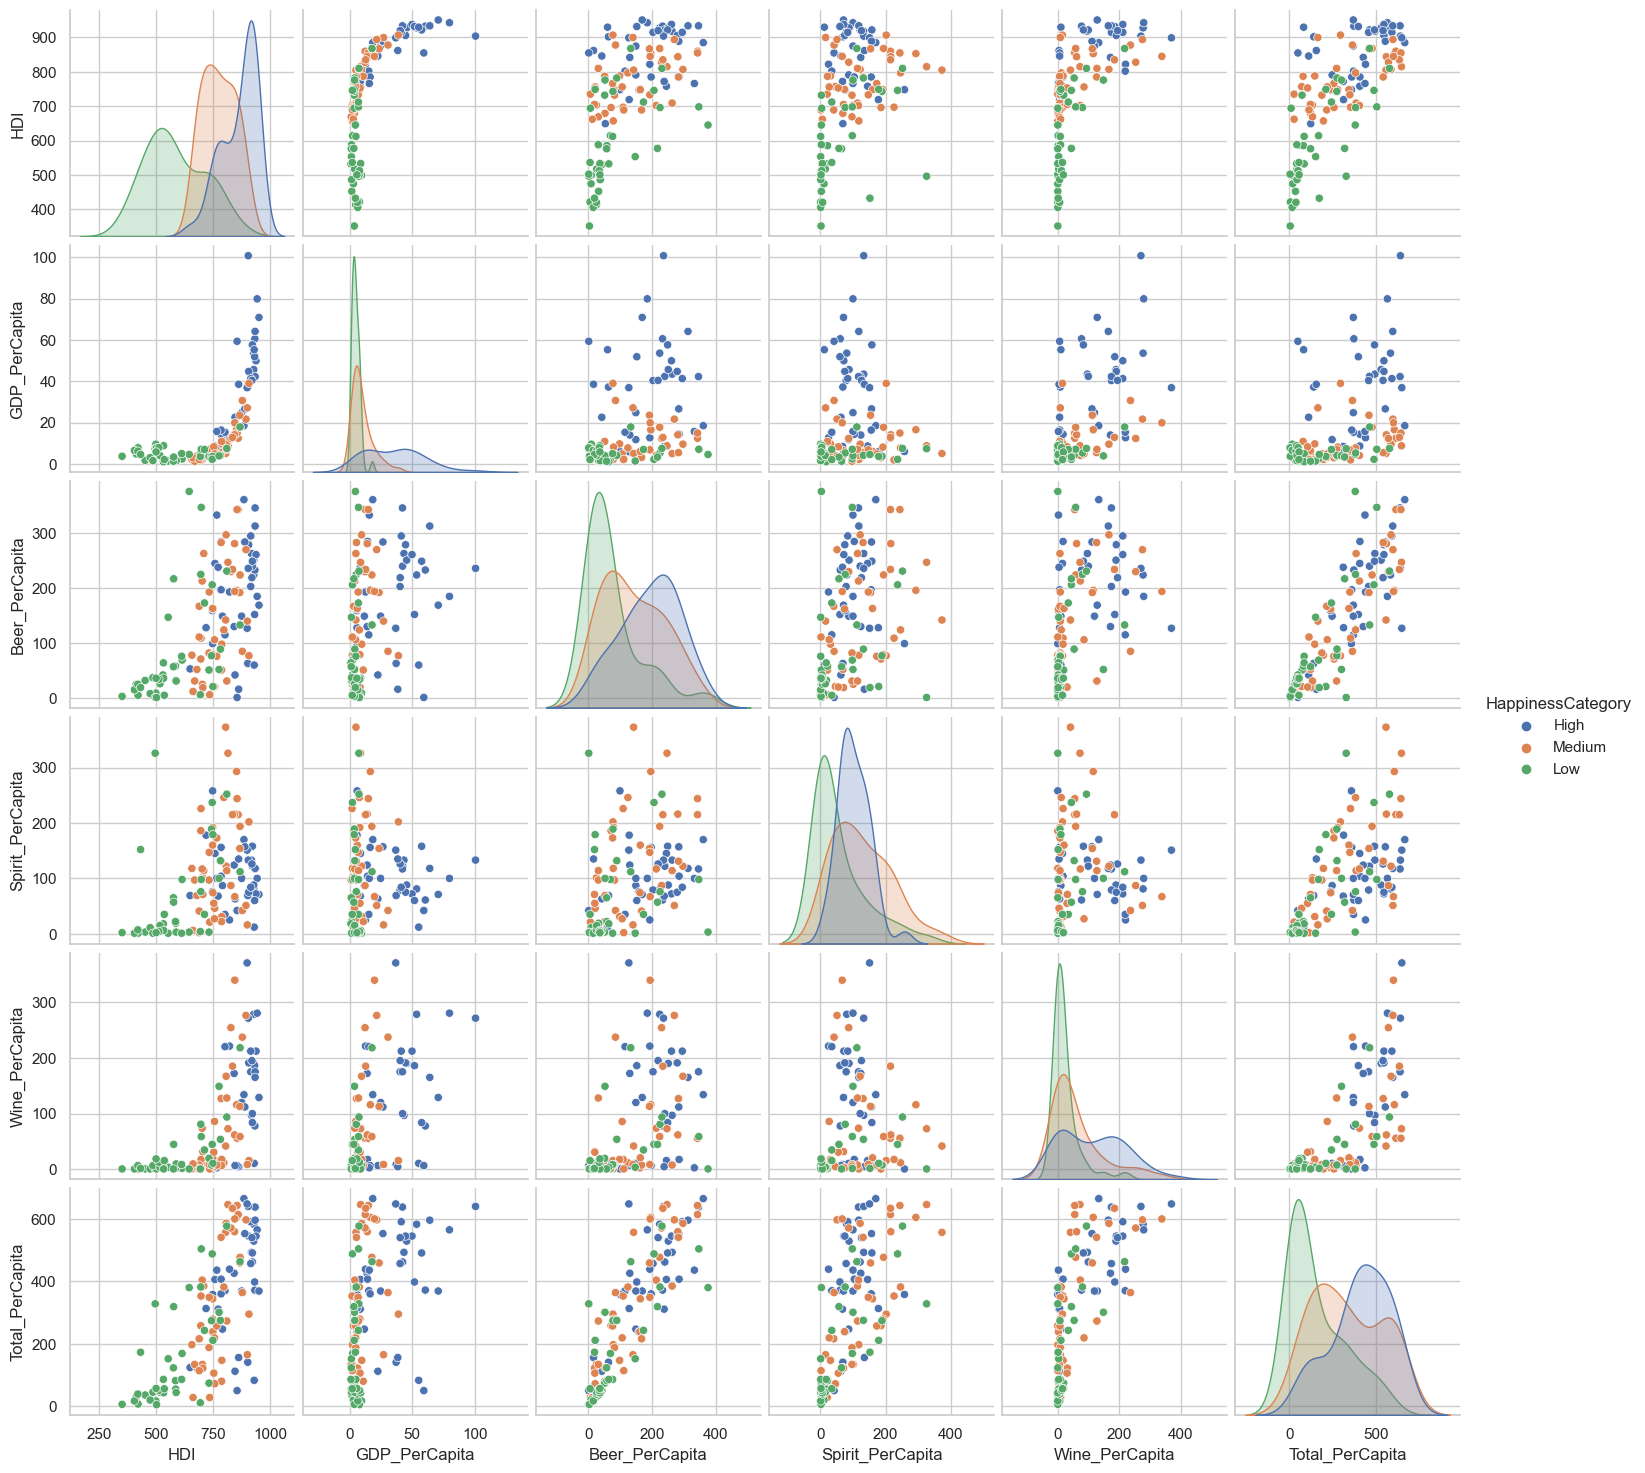

In [348]:
g = sb.pairplot(happiness_data, vars=["HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita", "Total_PerCapita"], hue = "HappinessCategory")
plt.show()

In [349]:
happiness_data.corr()

C:\Users\sanfe\AppData\Local\Temp\ipykernel_24900\121971746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happiness_data.corr()


,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Total_PerCapita
HappinessScore,1.000000,0.815163,0.687467,0.493367,0.256399,0.450589,0.547461
HDI,0.815163,1.000000,0.665806,0.588394,0.393413,0.602561,0.715698
GDP_PerCapita,0.687467,0.665806,1.000000,0.359063,0.055369,0.574032,0.452056
Beer_PerCapita,0.493367,0.588394,0.359063,1.000000,0.364855,0.474274,0.859574
Spirit_PerCapita,0.256399,0.393413,0.055369,0.364855,1.000000,0.118718,0.634431
Wine_PerCapita,0.450589,0.602561,0.574032,0.474274,0.118718,1.000000,0.719069
Total_PerCapita,0.547461,0.715698,0.452056,0.859574,0.634431,0.719069,1.000000


C:\Users\sanfe\AppData\Local\Temp\ipykernel_24900\1342057045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(happiness_data.corr(), cmap="YlGnBu", annot=True)


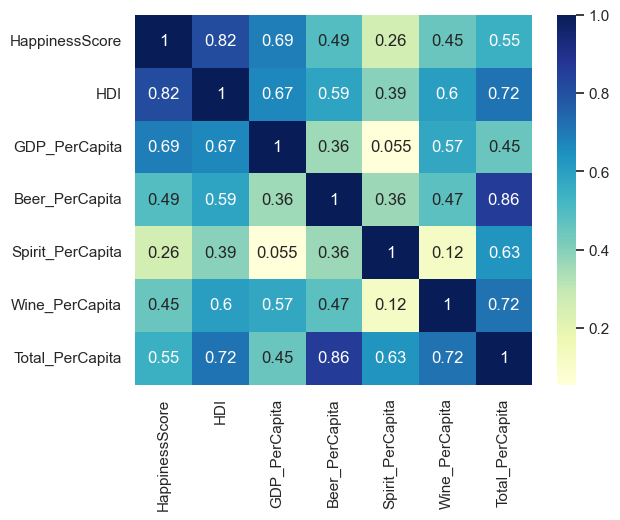

In [350]:
dataplot = sb.heatmap(happiness_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can see that there are some correlated variables: we have an high positive correlation between HDI and HappinessScore (with a value equal to 0.82): the higher the HDI, the higher the happiness score, and vice versa. 

The same can be proved by the following plot.

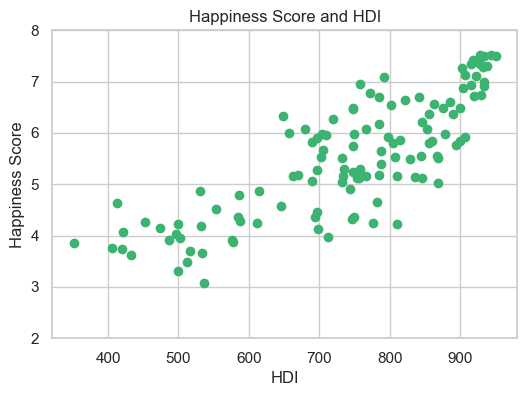

In [406]:
sb.set(style = "whitegrid")
plt.figure(figsize = (6,4))
plt.scatter(happiness_data.HDI, happiness_data.HappinessScore,c = "mediumseagreen")
plt.title("Happiness Score and HDI")
plt.xlabel("HDI")
plt.ylabel("Happiness Score")
plt.yticks(np.arange(2, 9))
plt.show()

HAPPINESS SCORE PER REGION

In [351]:
means_regions = []
for i in happiness_data.Region.unique():
    means_regions.append(happiness_data.loc[happiness_data.Region == i, "HappinessScore"].mean()) 
    # Compute the mean happiness score for each region
means_regions

[6.731400000000001,
 7.254,
 7.323499999999999,
 5.443727272727274,
 6.061,
 5.492,
 5.383444444444446,
 5.477,
 4.151464285714285]

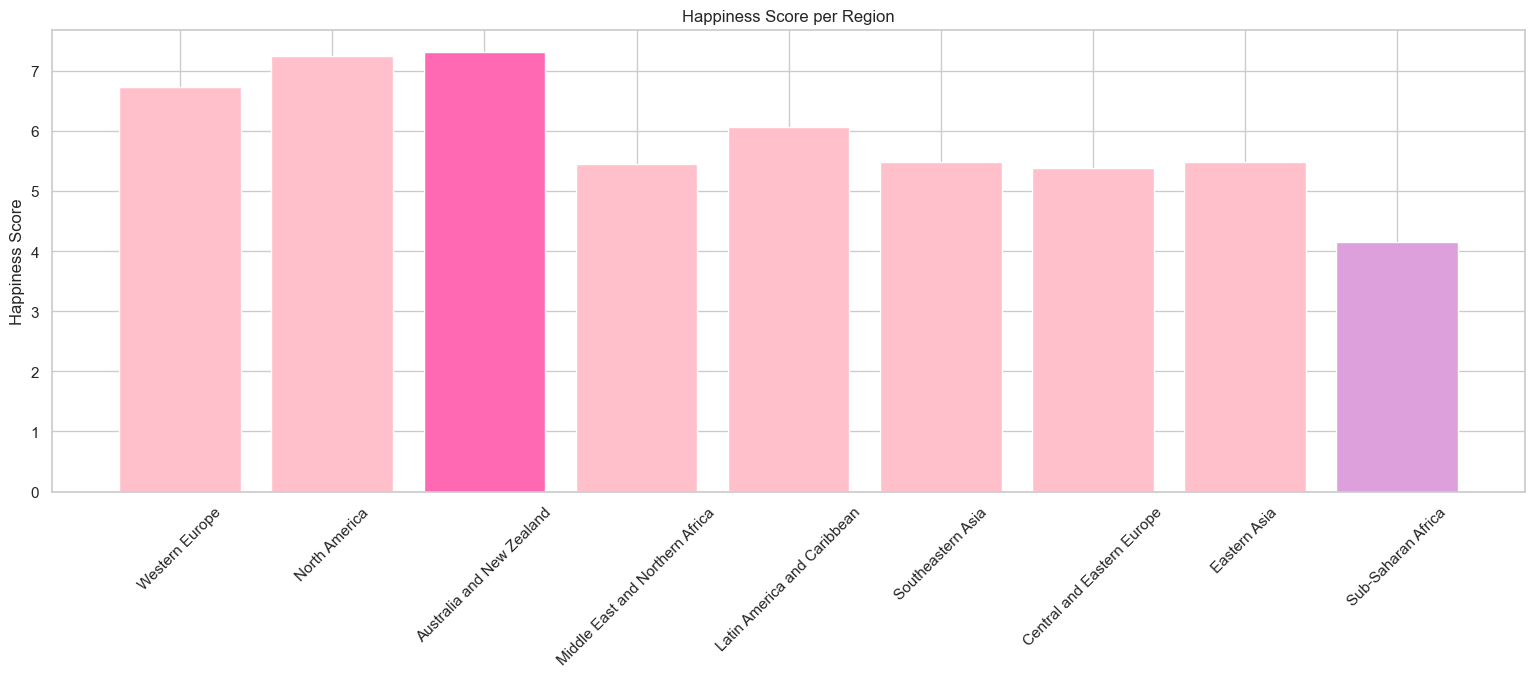

In [352]:
plt.figure(figsize = (19,6))
plt.bar(happiness_data.Region.unique(), means_regions, color = ["pink", "pink", "hotpink", "pink", "pink", "pink", "pink", "pink", "plum"])
plt.title("Happiness Score per Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation = 45)
plt.show()

I underlined with different colors the region with highest mean happiness score (higher than 7), Australia and New Zealand, and the region with the lowest mean happiness score (around 4), Sub-Saharan Africa.

HIGHEST AND LOWEST HAPPINESS SCORES

In [353]:
higher_score = happiness_data.HappinessScore.sort_values(ascending = False)[0:10] # List of the 10 countries with highest happiness score
higher_score

Country
Denmark        7.526
Switzerland    7.509
Iceland        7.501
Norway         7.498
Finland        7.413
Canada         7.404
Netherlands    7.339
New Zealand    7.334
Australia      7.313
Sweden         7.291
Name: HappinessScore, dtype: float64

In [354]:
lower_score = happiness_data.HappinessScore.sort_values(ascending = True)[0:10] # List of the 10 countries with lowest happiness score
lower_score

Country
Syria           3.069
Togo            3.303
Benin           3.484
Liberia         3.622
Tanzania        3.666
Madagascar      3.695
Burkina Faso    3.739
Chad            3.763
Niger           3.856
Angola          3.866
Name: HappinessScore, dtype: float64

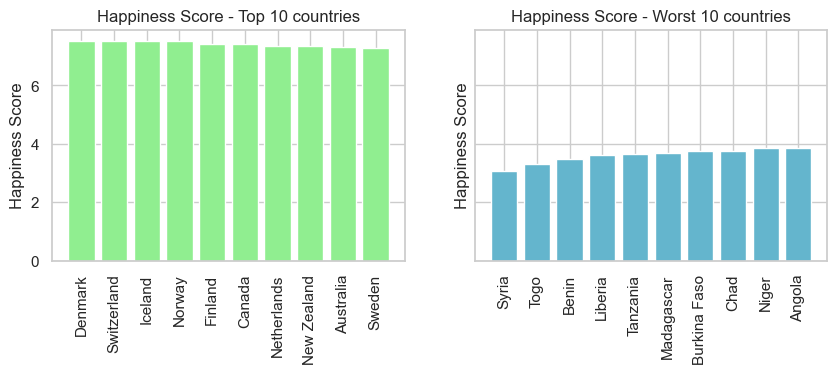

In [355]:
# Plot of the two lists
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

ax1.bar(higher_score.index, higher_score, color="lightgreen")
ax1.set_ylabel("Happiness Score")
ax1.set_title("Happiness Score - Top 10 countries")

ax2.bar(lower_score.index, lower_score, color="c")
ax2.set_ylabel("Happiness Score")
ax2.set_title("Happiness Score - Worst 10 countries")

ax1.set_xticks(range(len(higher_score.index)))
ax1.set_xticklabels(higher_score.index, rotation='vertical')
ax2.set_xticks(range(len(lower_score.index)))
ax2.set_xticklabels(lower_score.index, rotation='vertical')

plt.subplots_adjust(hspace=0.4)
plt.show()

This plots tell us that, although the countries with the highest values are in the north part of Europe, the region with highest mean Happiness score is Australia and New Zealand (with a value around 7.3). This is due to the fact that both Australia and New Zealand are in the top 10 (in position 9 and 8, respectively). On the contrary, Western Europe in composed of many other countries, which probably don't have such a good happiness score, giving a bad contribution to the mean value.  

The countries with the 10 lowest happiness scores are part of Africa, thus confirming what I have just found before: the region with the lowest mean value of Happiness score is Sub-Saharan Africa (with a value slightly above 4), and even Southeastern Africa has a very low value (around 5.5).

DRINK ANALYSIS

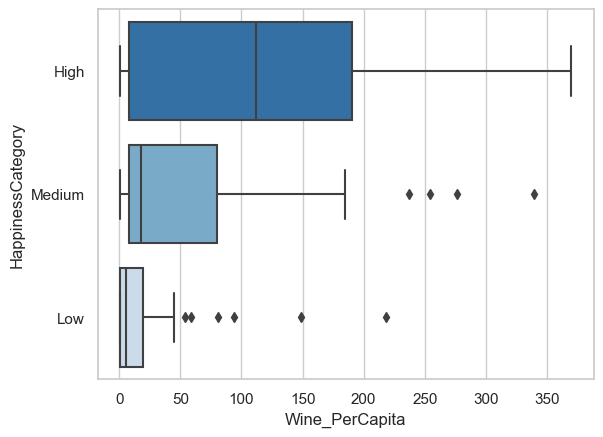

In [439]:
sb.boxplot(x =happiness_data.Wine_PerCapita, y = happiness_data.HappinessCategory, palette = "Blues_r")
plt.show()

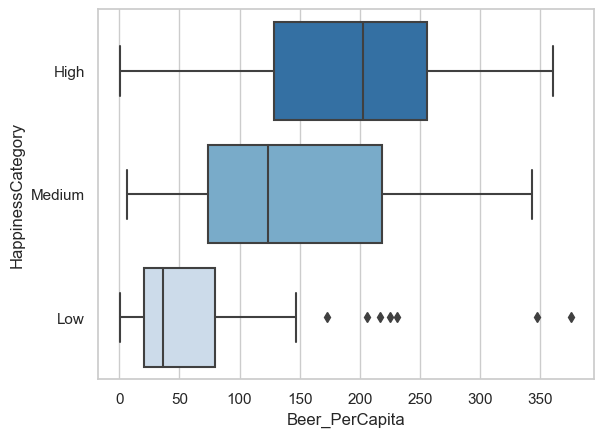

In [440]:
sb.boxplot(x =happiness_data.Beer_PerCapita, y = happiness_data.HappinessCategory, palette = "Blues_r")
plt.show()

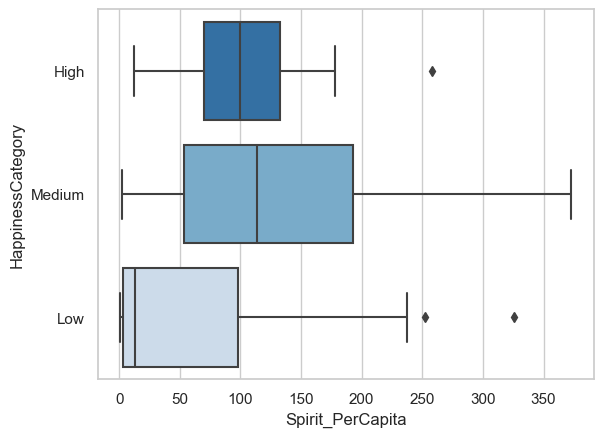

In [441]:
sb.boxplot(x =happiness_data.Spirit_PerCapita, y = happiness_data.HappinessCategory, palette = "Blues_r")
plt.show()

In [356]:
mean_total = []
for i in happiness_data.Region.unique():
    mean_total.append(happiness_data.loc[happiness_data.Region == i, "Total_PerCapita"].mean())
mean_total

[515.75,
 476.5,
 501.0,
 76.54545454545455,
 305.17391304347825,
 187.2,
 425.6666666666667,
 253.25,
 111.42857142857143]

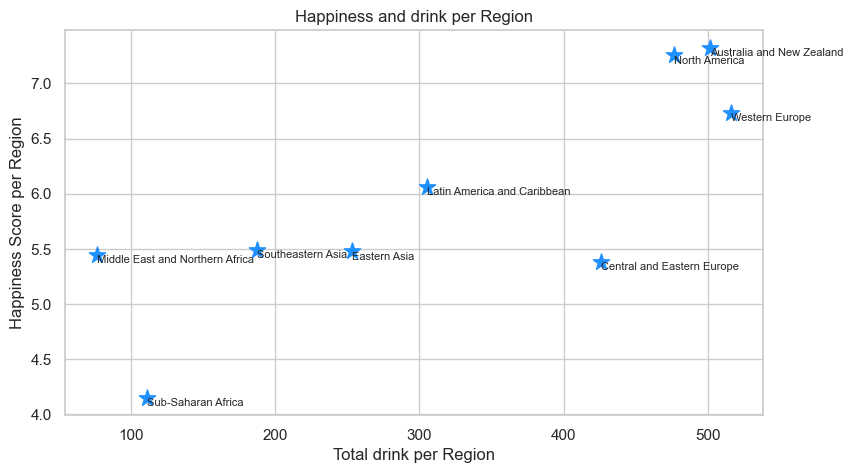

In [357]:
plt.figure(figsize = (9, 5))
plt.scatter(mean_total, means_regions, c = "dodgerblue", marker = "*", s = 150)

for i in range(happiness_data.Region.unique().size):
    plt.text(mean_total[i], means_regions[i], happiness_data.Region.unique()[i], ha='left', va='top', fontsize = 8)

plt.title("Happiness and drink per Region")
plt.xlabel("Total drink per Region")
plt.ylabel("Happiness Score per Region")
plt.show()

In general: the higher the drink per capita, the higher the happiness score.

In [358]:
x = np.array(mean_total).reshape(-1,1)
y = means_regions

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [359]:
from sklearn.preprocessing import PolynomialFeatures

degree = 6
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [361]:
y_pred = model.predict(x_test_poly)

In [362]:
metrics.mean_squared_error(y_test, y_pred)

0.33920972873789657

In [363]:
x_plot = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_plot_poly = poly_features.transform(x_plot)
y_plot = model.predict(x_plot_poly)

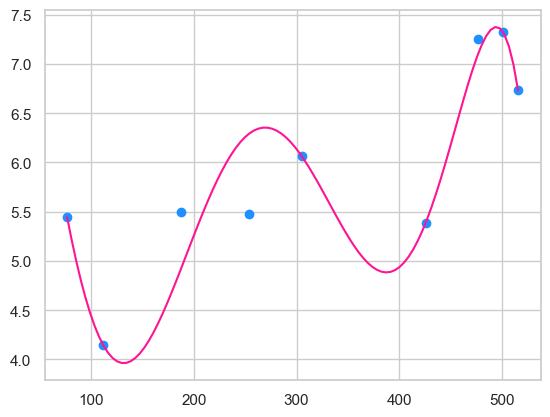

In [364]:
plt.scatter(x, y, label="Actual Data", c = "dodgerblue")

plt.plot(x_plot, y_plot, color = "deeppink", label = "Polynomial Regression")

k-NN

In [365]:
x_train, x_test, y_train, y_test = train_test_split(happiness_data.iloc[:, [3, 4, 5, 6, 7]].values, happiness_data.loc[:,"HappinessCategory"].values, test_size = 0.25, random_state = 12)
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

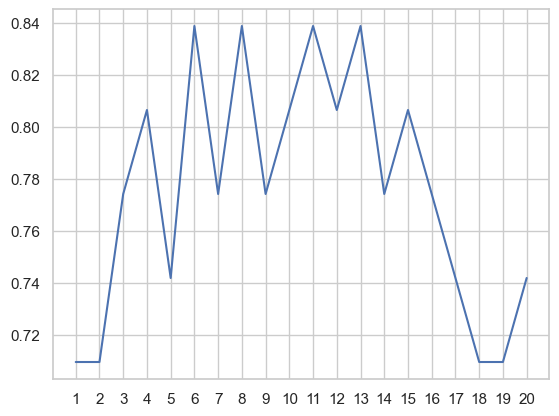

In [366]:
k_range = list(range(1,21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xticks(range(1,21))
plt.show()

In [367]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [369]:
metrics.accuracy_score(y_test, y_pred)

0.8387096774193549

In [370]:
metrics.confusion_matrix(y_test,y_pred)

array([[12,  0,  2],
       [ 0,  8,  2],
       [ 1,  0,  6]], dtype=int64)

In [371]:
y_pred

array(['Medium', 'Medium', 'High', 'Low', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'High', 'High', 'High', 'High', 'Low', 'Medium', 'High',
       'High', 'High', 'High', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Low', 'High', 'Low', 'Low', 'Medium', 'High'],
      dtype=object)

In [372]:
y_test

array(['High', 'Medium', 'High', 'Low', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'High', 'High', 'High', 'High', 'Low', 'Medium', 'High',
       'High', 'High', 'High', 'Low', 'High', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'High', 'Low', 'Low', 'Low', 'High'], dtype=object)

PCA

In [453]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features =happiness_data.loc[:,["HappinessScore", "HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita", "Total_PerCapita"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [454]:
n_components = 7 #start with 20 principal components
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(principal_components, columns = ["PC_" + str(x + 1) for x in range(n_components)])
principal_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,3.672354,-1.527142,0.647726,-0.504471,-0.085986,-0.520783,-1.575472e-16
1,4.068953,-2.181392,0.183953,-1.096456,0.857410,-0.374047,2.137710e-16
2,2.487440,-1.708315,-0.875299,0.789760,0.723173,0.090257,-2.741487e-16
3,2.728525,-2.186128,-0.907501,-0.067596,0.813166,0.075855,7.099522e-16
4,2.765111,-0.415193,-0.659998,0.607623,0.306290,-0.163088,-6.702292e-16


In [455]:
print("explained variance: ", pca.explained_variance_ratio_)

explained variance:  [6.00733938e-01 1.70547972e-01 1.01140516e-01 6.75963361e-02
 3.92075926e-02 2.07736457e-02 3.00074049e-33]


In [456]:
sum_variance = []
for i in range(1, 8):
    sum_variance.append(sum(pca.explained_variance_ratio_[:i]))
sum_variance #cumulative variance

[0.6007339376561255,
 0.7712819097194328,
 0.8724224255885048,
 0.9400187616891105,
 0.9792263543180089,
 1.0000000000000002,
 1.0000000000000002]

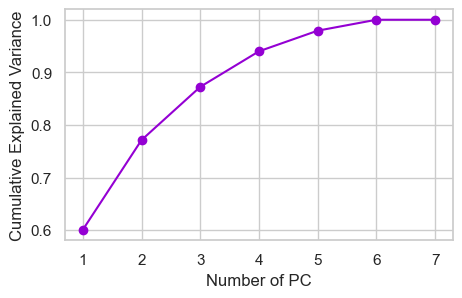

In [457]:
#graph that represents the cumulative variance explained by the different numbers of components
plt.figure(figsize = (5, 3))
plt.plot(range(1, 8), sum_variance, color = "darkviolet", marker = "o")
plt.xlabel("Number of PC")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(list(range(1, 8)))
plt.show()

In [458]:
n_components = 3
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(scaled_features)

In [459]:
principal_df = pd.DataFrame(principal_components, columns = ["PC_" + str(x+1) for x in range(n_components)])
print("explained variance: ", pca.explained_variance_ratio_)

explained variance:  [0.60073394 0.17054797 0.10114052]


In [380]:
principal_df["HappinessCategory"] = happiness_data.HappinessCategory.values

In [381]:
principal_df.head()

,PC_1,PC_2,PC_3,HappinessCategory
0,3.672354,-1.527142,0.647726,High
1,4.068953,-2.181392,0.183953,High
2,2.487440,-1.708315,-0.875299,High
3,2.728525,-2.186128,-0.907501,High
4,2.765111,-0.415193,-0.659998,High


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


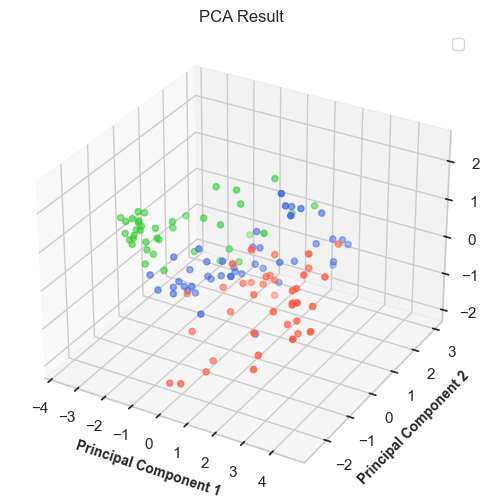

In [382]:
color_mapping = {"High": "tomato", "Medium": "royalblue", "Low": "limegreen"}
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(projection='3d')

ax.grid(color = "grey", linestyle = "-.", linewidth = 0.3, alpha = 0.2)

ax.scatter3D(principal_df.iloc[:, 0], principal_df.iloc[:, 1], principal_df.iloc[:, 2], c = happiness_data["HappinessCategory"].map(color_mapping), marker = "o")
ax.set_xlabel("Principal Component 1", fontsize = 10, fontweight = "bold")
ax.set_ylabel("Principal Component 2", fontsize = 10, fontweight = "bold")
ax.set_zlabel("Principal Component 3", fontsize = 10, fontweight = "bold")
plt.title("PCA Result")
plt.legend()
plt.show()

In [383]:
x_train, x_test, y_train, y_test = train_test_split(principal_df.iloc[:, [0, 1, 2]].values, principal_df.loc[:,"HappinessCategory"].values, test_size = 0.25, random_state = 12)

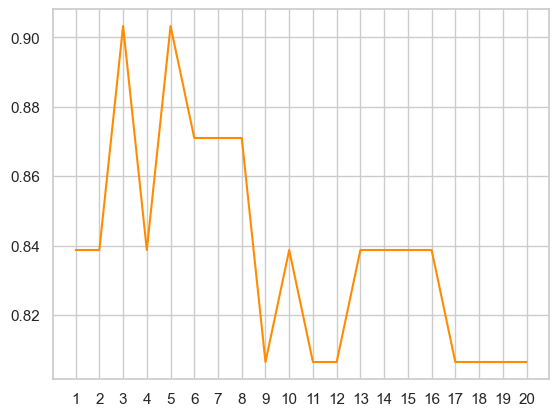

In [384]:
k_range = list(range(1,21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores, c = "darkorange")
plt.xticks(range(1,21))
plt.show()

In [385]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [386]:
metrics.accuracy_score(y_test, y_pred)

0.9032258064516129

In [387]:
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  1],
       [ 0,  9,  1],
       [ 1,  0,  6]], dtype=int64)

In [388]:
y_pred

array(['Medium', 'Medium', 'High', 'Low', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'High', 'High', 'High', 'High', 'Low', 'Medium', 'High',
       'High', 'High', 'High', 'Low', 'High', 'Medium', 'Medium',
       'Medium', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High'],
      dtype=object)

In [389]:
y_test

array(['High', 'Medium', 'High', 'Low', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'High', 'High', 'High', 'High', 'Low', 'Medium', 'High',
       'High', 'High', 'High', 'Low', 'High', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'High', 'Low', 'Low', 'Low', 'High'], dtype=object)

cose da fare: vedere se valutare HDI e GDP ed eventualmente altro sui drink (esempio pie plots)!!!!

In [281]:
import geopandas as gpd

C:\Users\sanfe\AppData\Local\Temp\ipykernel_24900\3013236796.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


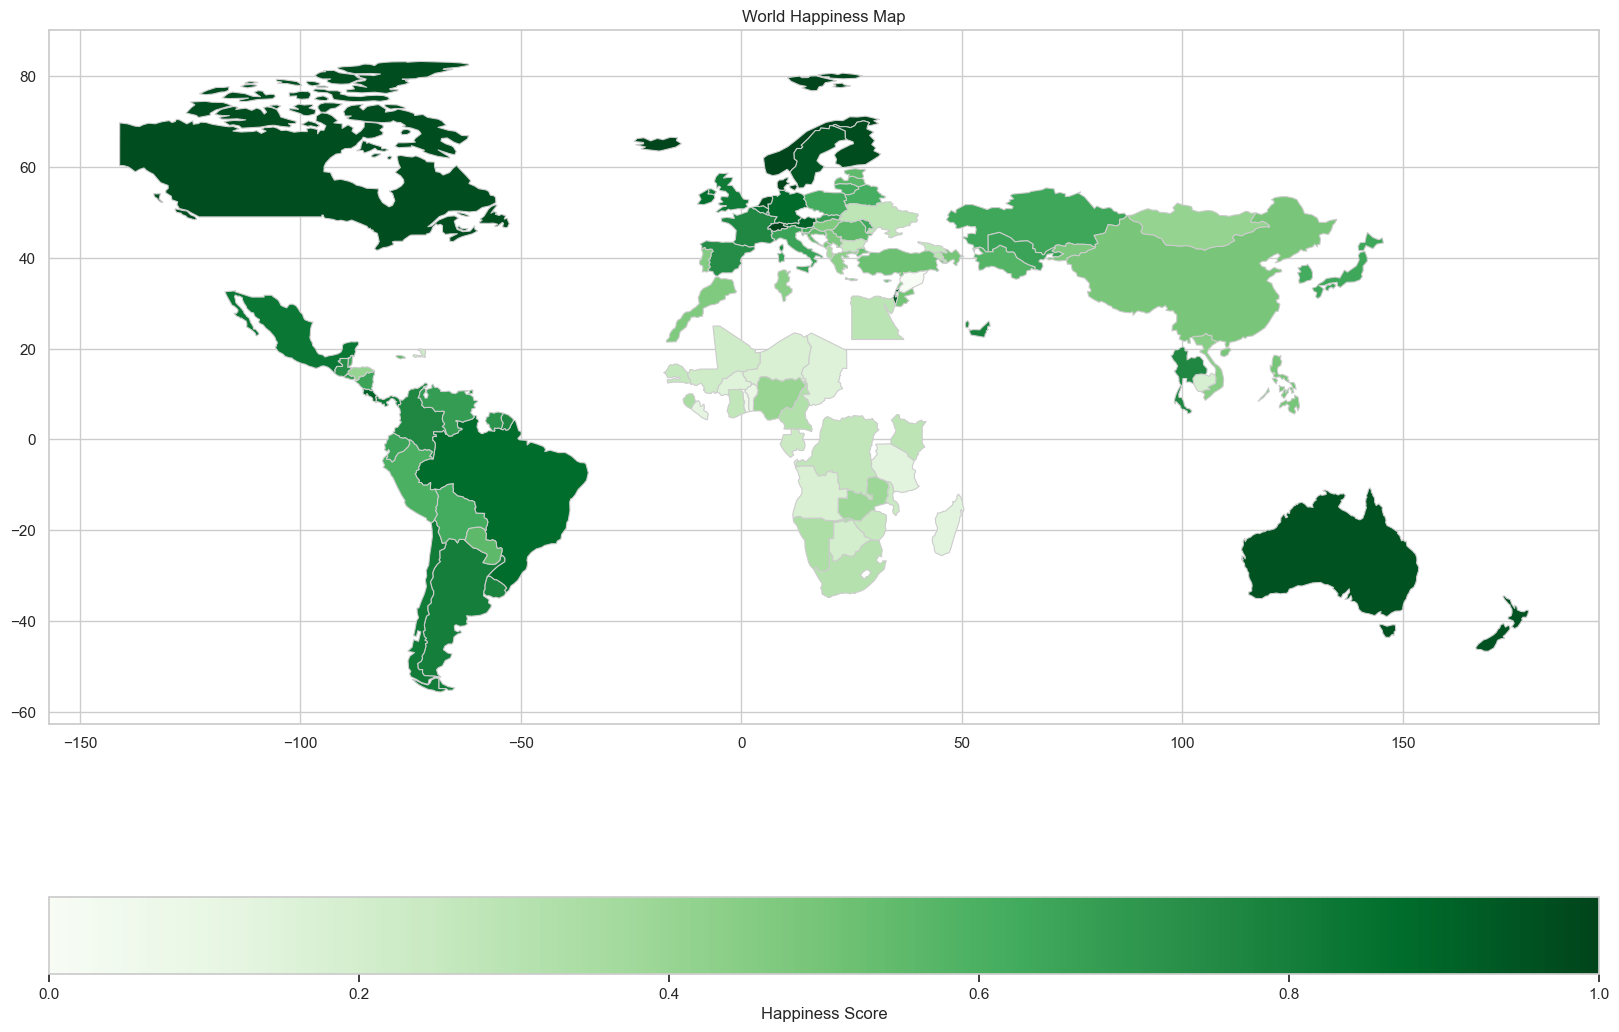

In [393]:
# Load the country shapefile with latitude and longitude coordinates
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge the Natural Earth dataset with the happiness scores
world = world.merge(happiness_data, left_on = "name", right_index = True)

# Create a new figure and axis
fig, ax = plt.subplots(figsize = (20, 15))

# Plot the world map with colored countries based on the happiness score
world.plot(column = "HappinessScore", cmap = "Greens", linewidth = 0.8, ax = ax, edgecolor = "0.8")

# Add a colorbar to the map
sm = plt.cm.ScalarMappable(cmap = "Greens")
sm.set_array([])
cbar = plt.colorbar(sm, orientation = "horizontal", ax = ax)
cbar.set_label("Happiness Score")

ax.set_title("World Happiness Map")
plt.show()